In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import sklearn

In [2]:
import os

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
import sys

sys.path.insert(0 , r'fashion-mnist\fashion-mnist-master\fashion-mnist-master\utils')

import mnist_reader

In [5]:
(X_train), (y_train) = mnist_reader.load_mnist(r'fashion-mnist\fashion-mnist-master\fashion-mnist-master\data\fashion', kind='train')
(X_test), (y_test) = mnist_reader.load_mnist(r'fashion-mnist\fashion-mnist-master\fashion-mnist-master\data\fashion', kind='t10k')

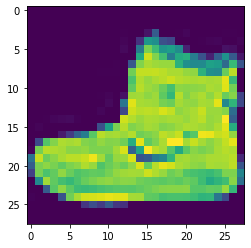

In [6]:
plt.imshow(X_train.reshape(60000,28,28)[0])
plt.show()

In [7]:
X_Train = X_train.reshape(60000,28,28,1)
X_Test = X_test.reshape(10000,28,28,1)

In [8]:
Y_Train = y_train.copy()
Y_Test = y_test.copy()

In [9]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

class_names[Y_Train[0]]

'Ankle boot'

In [10]:
X_Train = X_Train /255.
X_Test = X_Test /255.

In [11]:
X_Valid , X_Train = X_Train[:5000] , X_Train[5000:]
Y_Valid , Y_Train = Y_Train[:5000] , Y_Train[5000:]

In [12]:
print('X Train: ' , X_Train.shape)
print('Y Train: ' , Y_Train.shape)
print('X Valid: ' , X_Valid.shape)
print('Y Valid: ' , Y_Valid.shape)
print('X Test: ' , X_Test.shape)
print('Y Test: ' , Y_Test.shape)

X Train:  (55000, 28, 28, 1)
Y Train:  (55000,)
X Valid:  (5000, 28, 28, 1)
Y Valid:  (5000,)
X Test:  (10000, 28, 28, 1)
Y Test:  (10000,)


In [13]:
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32 , kernel_size = (3,3) , strides = 1 , padding = 'valid' , activation = 'relu' ,
                              input_shape= (28,28 , 1)))
model.add(keras.layers.MaxPooling2D(2,2))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300 , activation = 'relu')) 
model.add(keras.layers.Dense(100 , activation = 'relu'))  
model.add(keras.layers.Dense(10 , activation = 'softmax'))  

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy', #loss function = cross entropy,for binary classify = binary_crossentropy
             optimizer = 'sgd',                          # sigmoid optimizer
             metrics = ['accuracy'])                     

In [17]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [19]:
model_history = model.fit(X_Train , Y_Train , epochs = 10 , validation_data = (X_Valid , Y_Valid))

Epoch 1/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2653 - accuracy: 0.9029 - val_loss: 0.2920 - val_accuracy: 0.8966
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2554 - accuracy: 0.9075 - val_loss: 0.2757 - val_accuracy: 0.9006
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2459 - accuracy: 0.9092 - val_loss: 0.3361 - val_accuracy: 0.8778
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2373 - accuracy: 0.9135 - val_loss: 0.2721 - val_accuracy: 0.9026
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2309 - accuracy: 0.9151 - val_loss: 0.2651 - val_accuracy: 0.9042
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2207 - accuracy: 0.9189 - val_loss: 0.2653 - val_accuracy: 0.9046
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2139 - accuracy: 0.9221 - val_loss: 0.2690 - val_accuracy:

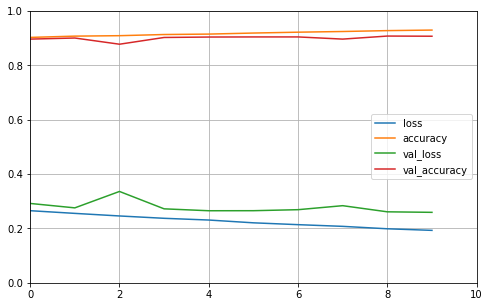

In [22]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0 , 1)
plt.gca().set_xlim(0 , 10)
plt.show()

In [23]:
ev = model.evaluate(X_Test , Y_Test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2774 - accuracy: 0.8990


In [24]:
ev

[0.27741435170173645, 0.8989999890327454]

In [25]:
X_new = X_Test[:3]

In [32]:
Y_Pred = np.argmax(model.predict(X_new) , axis = -1)
Y_Pred

array([9, 2, 1], dtype=int64)

AxesImage(54,36;334.8x217.44)


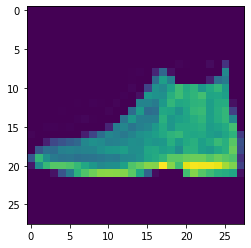

In [33]:
print(plt.imshow(X_Test[0].reshape(28,28)))

In [39]:
print(class_names[9],
class_names[2],
class_names[1])

Ankle boot Pullover Trouser


AxesImage(54,36;334.8x217.44)


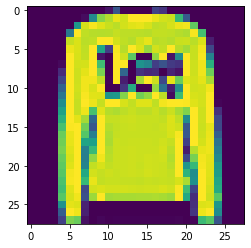

In [40]:
print(plt.imshow(X_Test[1].reshape(28,28)))

AxesImage(54,36;334.8x217.44)


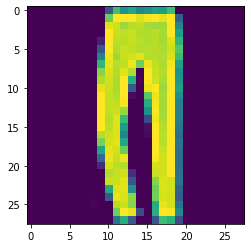

In [41]:
print(plt.imshow(X_Test[2].reshape(28,28)))